In [98]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/steam-recommendation-nlp-dataset/train.csv
/kaggle/input/steam-recommendation-nlp-dataset/test.csv
/kaggle/input/steam-recommendation-nlp-dataset/game_overview.csv


In [99]:
from bs4 import BeautifulSoup
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
import re

In [100]:
import seaborn as sns
import scipy
import matplotlib.pyplot as plt
import scikitplot as skplt
from wordcloud import WordCloud

In [101]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [102]:
df = pd.read_csv('/kaggle/input/steam-recommendation-nlp-dataset/train.csv')
game_df = pd.read_csv('/kaggle/input/steam-recommendation-nlp-dataset/game_overview.csv')
testing_df=  pd.read_csv('/kaggle/input/steam-recommendation-nlp-dataset/test.csv')

In [103]:
def rep(text):
    text = re.sub('♥♥♥♥',"worst bad horrible game",text)
    return text

df['user_review']=df.user_review.apply(rep)
testing_df['user_review']=testing_df.user_review.apply(rep)

In [104]:
def low(text):
    return text.lower()

df['user_review']=df.user_review.apply(low)
testing_df['user_review']=testing_df.user_review.apply(low)

In [105]:
def asc(text):
    text = re.sub('[^a-zA-Z]'," ",text)
    return text

df['user_review']=df.user_review.apply(asc)
testing_df['user_review']=testing_df.user_review.apply(asc)


In [106]:
testing_df.head(5)

,review_id,title,year,user_review
0,1603,Counter-Strike: Global Offensive,2015.0,nice graphics new maps weapons and models b...
1,1604,Counter-Strike: Global Offensive,2018.0,i would not recommend getting into this at its...
2,1605,Counter-Strike: Global Offensive,2018.0,edit i have tried playing cs go recent...
3,1606,Counter-Strike: Global Offensive,2015.0,the game is great but the community is the wo...
4,1607,Counter-Strike: Global Offensive,2015.0,i thank trulyrazor for buying this for me a lo...


In [107]:
def punctuation_removal(messy_str):
    clean_list = [char for char in messy_str if char not in string.punctuation]
    clean_str = ''.join(clean_list)
    return clean_str

In [108]:

df['user_review']=df.user_review.apply(punctuation_removal)
testing_df['user_review']=testing_df.user_review.apply(punctuation_removal)


In [109]:
df.head(4)

,review_id,title,year,user_review,user_suggestion
0,1,Spooky's Jump Scare Mansion,2016.0,i m scared and hearing creepy voices so i ll...,1
1,2,Spooky's Jump Scare Mansion,2016.0,best game more better than sam pepper s youtu...,1
2,3,Spooky's Jump Scare Mansion,2016.0,a littly iffy on the controls but once you kn...,1
3,4,Spooky's Jump Scare Mansion,2015.0,great game fun and colorful and all that a si...,1


In [110]:
result_reviews = df['user_review'] 
testing_reviews = testing_df['user_review'] 

from textblob import TextBlob


from tqdm import tqdm
train_sentiments = []
for review in tqdm(result_reviews):
    blob = TextBlob(review)
    train_sentiments += [blob.sentiment.polarity]
    
from tqdm import tqdm
testing_sentiments = []
for review in tqdm(testing_reviews):
    blob = TextBlob(review)
    testing_sentiments += [blob.sentiment.polarity]

100%|██████████| 8045/8045 [00:16<00:00, 497.62it/s]


In [111]:
df['sentiment'] = train_sentiments
testing_df['sentiment'] =testing_sentiments

# correlation

In [112]:
df=df.dropna()

In [113]:
np.corrcoef(df["user_suggestion"], df['year'])

array([[ 1.        , -0.12004375],
       [-0.12004375,  1.        ]])

In [114]:
np.corrcoef(df["user_suggestion"], df["sentiment"])

array([[1.        , 0.39280271],
       [0.39280271, 1.        ]])

In [115]:
# def num(x):
#     if x >= 0:
#         return 1
#     elif x < 0:
#         return -1

In [116]:
# df['sentiment'] = df.sentiment.apply(num)
# testing_df['sentiment'] =testing_df.sentiment.apply(num)

In [117]:
# np.corrcoef(df["user_suggestion"], df["sentiment"])

In [118]:
def stopp(text):
    text = text.split()
    text = [i for i in text if not i in set(stopwords.words('english'))]
    text = ' '.join(text)
    return text

In [119]:
stopp("hello my name is HERO")

'hello name HERO'

# Tags

In [120]:
def tag(text):
    text = text[1:-1]
    return text

game_df.tags=game_df.tags.apply(tag)
game_df['tags']=game_df.tags.apply(low)
game_df['tags']=game_df.tags.apply(asc)
game_df['tags']=game_df.tags.apply(punctuation_removal)
game_df['tags']=game_df.tags.apply(stopp)


In [121]:
game_df.head(2)

,title,developer,publisher,tags,overview
0,Spooky's Jump Scare Mansion,Lag Studios,Lag Studios,horror free play cute first person singleplaye...,Can you survive 1000 rooms of cute terror? Or ...
1,Sakura Clicker,Winged Cloud,Winged Cloud,nudity anime free play mature sexual content c...,The latest entry in the Sakura series is more ...


In [122]:
vectorizer = CountVectorizer(tokenizer = lambda x: x.split())
tag_dtm = vectorizer.fit_transform(game_df['tags'])
print("Number of data points :", tag_dtm.shape[0])
print("Number of unique tags :", tag_dtm.shape[1])

In [125]:
print(type(tag_dtm))
# print(type(testing_tag_dtm))

<class 'scipy.sparse.csr.csr_matrix'>


In [126]:
# tag_vector= tag_dtm.toarray()
# tag_vector =  pd.DataFrame(tag_vector)
# tag_vector.head()

In [127]:
#'get_feature_name()' gives us the vocabulary.
tags = vectorizer.get_feature_names()
#Lets look at the tags we have.
print("Some of the tags we have :", tags[:30])

Some of the tags we have : ['access', 'action', 'adventure', 'america', 'anime', 'apocalyptic', 'arcade', 'atmospheric', 'base', 'based', 'basketball', 'battle', 'beat', 'blood', 'board', 'book', 'builder', 'building', 'bullet', 'capitalism', 'card', 'cartoon', 'cartoony', 'casual', 'character', 'city', 'class', 'classic', 'clicker', 'co']


In [128]:
freqs = tag_dtm.sum(axis=0).A1
result = dict(zip(tags, freqs))

In [129]:
result

{'access': 28,
 'action': 64,
 'adventure': 41,
 'america': 1,
 'anime': 14,
 'apocalyptic': 1,
 'arcade': 3,
 'atmospheric': 7,
 'base': 3,
 'based': 18,
 'basketball': 1,
 'battle': 4,
 'beat': 2,
 'blood': 1,
 'board': 3,
 'book': 1,
 'builder': 1,
 'building': 10,
 'bullet': 1,
 'capitalism': 1,
 'card': 14,
 'cartoon': 1,
 'cartoony': 1,
 'casual': 28,
 'character': 9,
 'city': 1,
 'class': 1,
 'classic': 3,
 'clicker': 6,
 'co': 67,
 'comedy': 5,
 'comic': 1,
 'competitive': 11,
 'content': 4,
 'controller': 6,
 'crafting': 8,
 'crawler': 2,
 'cult': 1,
 'customization': 10,
 'cute': 5,
 'dark': 4,
 'dating': 3,
 'death': 1,
 'defense': 5,
 'destruction': 1,
 'difficult': 4,
 'dragons': 3,
 'driving': 1,
 'dungeon': 2,
 'dungeons': 1,
 'e': 4,
 'early': 28,
 'education': 1,
 'em': 2,
 'exploration': 3,
 'family': 3,
 'fantasy': 25,
 'fast': 1,
 'female': 3,
 'fi': 7,
 'fighter': 1,
 'fighting': 2,
 'first': 19,
 'fishing': 2,
 'flight': 2,
 'fps': 24,
 'free': 63,
 'friendly': 3,

In [130]:
tags_df = pd.DataFrame(result.items(),columns=['Tags','Counts'])

In [131]:
tags_df.head()

,Tags,Counts
0,access,28
1,action,64
2,adventure,41
3,america,1
4,anime,14


In [132]:
tags_df.Counts.mean()

9.106145251396647

In [133]:
tags_df.Counts

0      28
1      64
2      41
3       1
4      14
       ..
174     2
175     3
176    17
177    40
178     6
Name: Counts, Length: 179, dtype: int64

In [134]:
tag_df_sorted = tags_df.sort_values(['Counts'], ascending=False)
tag_counts = tag_df_sorted['Counts'].values

In [135]:
tags_df[tags_df.Counts==110]

,Tags,Counts
103,multiplayer,110


In [136]:
tag_counts

array([110,  67,  67,  64,  63,  63,  48,  41,  40,  40,  37,  37,  34,
        34,  28,  28,  28,  28,  25,  25,  24,  24,  21,  21,  20,  19,
        19,  18,  17,  17,  17,  15,  14,  14,  11,  11,  11,  10,  10,
        10,   9,   9,   9,   9,   8,   8,   8,   7,   7,   7,   7,   6,
         6,   6,   6,   6,   6,   6,   6,   6,   6,   6,   5,   5,   5,
         5,   5,   5,   5,   5,   5,   5,   4,   4,   4,   4,   4,   4,
         4,   4,   3,   3,   3,   3,   3,   3,   3,   3,   3,   3,   3,
         3,   3,   3,   3,   3,   3,   3,   3,   3,   3,   2,   2,   2,
         2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,
         2,   2,   2,   2,   2,   2,   2,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1])

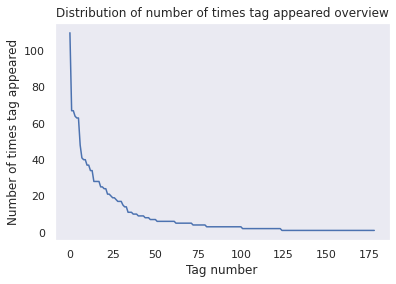

In [137]:
plt.plot(tag_counts)
plt.title("Distribution of number of times tag appeared overview")
plt.grid()
plt.xlabel("Tag number")
plt.ylabel("Number of times tag appeared")
plt.show()

In [138]:
# Store tags greater than 10K in one list
lst_tags_gt_10k = tags_df[tags_df.Counts>5].Tags
#Print the length of the list
print ('{} Tags are used more than 5 times'.format(len(lst_tags_gt_10k)))
# Store tags greater than 100K in one list
lst_tags_gt_100k = tags_df[tags_df.Counts>15].Tags
#Print the length of the list.
print ('{} Tags are used more than 15 times'.format(len(lst_tags_gt_100k)))

62 Tags are used more than 5 times
31 Tags are used more than 15 times


- There are total 62 tags which are used more than 5 times.
- 31 tags are used more than 15 times.
- multiplayer is the most used tag! 110 times

In [139]:
tag_df_sorted

,Tags,Counts
103,multiplayer,110
110,op,67
29,co,67
1,action,64
66,free,63
...,...,...
112,paced,1
37,cult,1
107,nsfw,1
105,naval,1


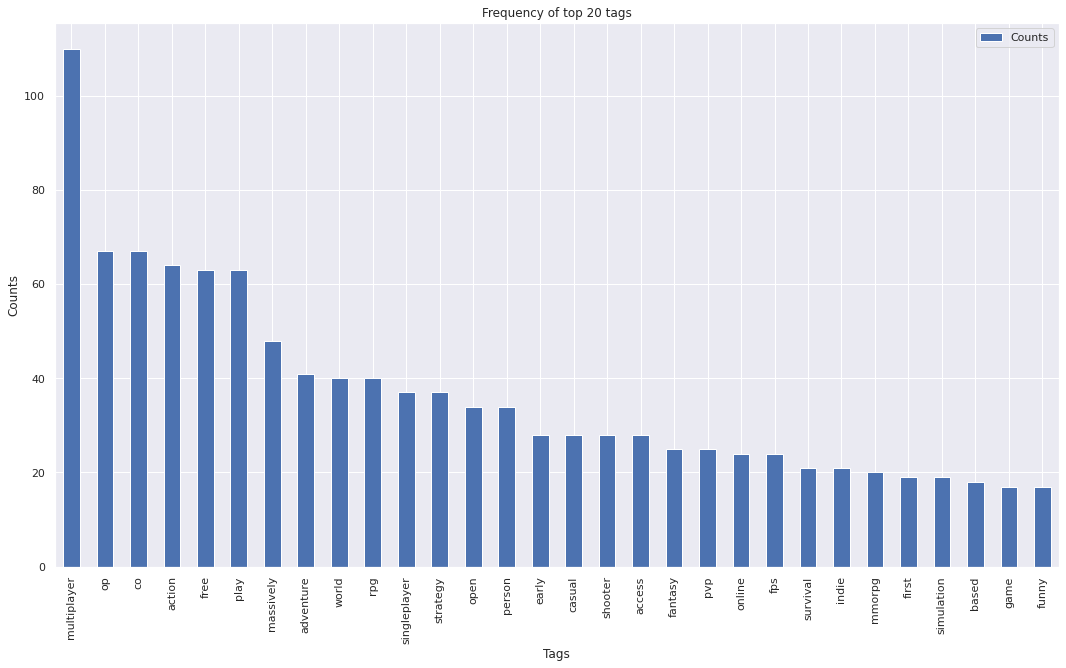

In [140]:
i=np.arange(30)
tag_df_sorted.head(30).plot(kind='bar',figsize=(18, 10))
plt.title('Frequency of top 20 tags')
# plt.figure(figsize=(10,10))
plt.xticks(i, tag_df_sorted['Tags'])
plt.xlabel('Tags')
plt.ylabel('Counts')
# plt.set_size_inches(10,10)
plt.show()

# merging

In [146]:
big_df = pd.merge(df, game_df,on='title', how='left')
testing_df = pd.merge(testing_df, game_df,on='title', how='left')

In [ ]:
testing_df.head(2)

In [147]:
vectorizer = CountVectorizer(tokenizer = lambda x: x.split())
# tag_dtm = vectorizer.fit_transform(game_df['tags'])

In [150]:
training_tag_dtm = vectorizer.fit_transform(big_df['tags'])
training_tag_vector= training_tag_dtm.toarray()
training_tag_vector =  pd.DataFrame(training_tag_vector)
training_tag_vector.shape

(17316, 158)

In [151]:
testing_tag_dtm = vectorizer.transform(testing_df['tags'])
testing_tag_vector= testing_tag_dtm.toarray()
testing_tag_vector =  pd.DataFrame(testing_tag_vector)
testing_tag_vector.shape

KeyError: 'tags'

In [46]:
big_df.sample(10)

,review_id,title,year,user_review,user_suggestion,sentiment,developer,publisher,tags,overview
11885,17509,Bless Online,2018.0,wanted to give the game a chance but it runs l...,0,-0.228571,NEOWIZ BLESS STUDIO,NEOWIZ,mmorpg open world massively multiplayer rpg ad...,“We invite you all to the world of Bless Onlin...
17295,25517,EverQuest II,2014.0,the good world of warcraft better than most ...,1,0.500000,Daybreak Game Company,Daybreak Game Company,free play massively multiplayer rpg mmorpg fan...,EverQuest® II is the epitome of massively mult...
3046,3533,War Thunder,2016.0,product received for freethere is no doubt tha...,0,0.194048,Gaijin Entertainment,Gaijin Entertainment,free play world war ii multiplayer simulation ...,War Thunder is the most comprehensive free-to-...
12943,18889,Fallout Shelter,2017.0,there isn t really any longterm investment unl...,0,0.108418,Bethesda Game Studios,Bethesda Softworks,free play survival base building post apocalyp...,Fallout Shelter puts you in control of a state...
14153,20246,Infestation: The New Z,2016.0,pls repair bugs not only i cant join to some ...,1,-0.300000,Fredaikis AB,Fredaikis AB,zombies free play survival multiplayer open wo...,Infestation: The New Z is a FREE TO PLAY multi...
3394,3900,Ring of Elysium,2018.0,early access reviewthis game is awesome contr...,1,0.230365,Aurora Studio,Tencent Games,early access free play battle royale shooter s...,
3834,4351,Team Fortress 2,2014.0,this game it s just good play it and you ll ...,1,-0.047222,Valve,Valve,free play multiplayer fps action shooter class...,"""The most fun you can have online"" - PC GamerI..."
12580,18212,RaceRoom Racing Experience,2015.0,file ...,0,-0.208205,Sector3 Studios,"Sector3 Studios, RaceRoom Entertainment AG",racing free play multiplayer simulation drivin...,RaceRoom is the premier free-to-play racing si...
3037,3524,War Thunder,2016.0,the game is doing pretty well and is pretty fu...,0,0.163889,Gaijin Entertainment,Gaijin Entertainment,free play world war ii multiplayer simulation ...,War Thunder is the most comprehensive free-to-...
5059,7051,Brawlhalla,2015.0,early access reviewone of my favorite games on...,1,0.208333,Blue Mammoth Games,Ubisoft,free play multiplayer fighting fighter action ...,Brawlhalla: An eternal battle arena where the ...


In [47]:
big_df['user_suggestion'].value_counts()

1    9887
0    7429
Name: user_suggestion, dtype: int64

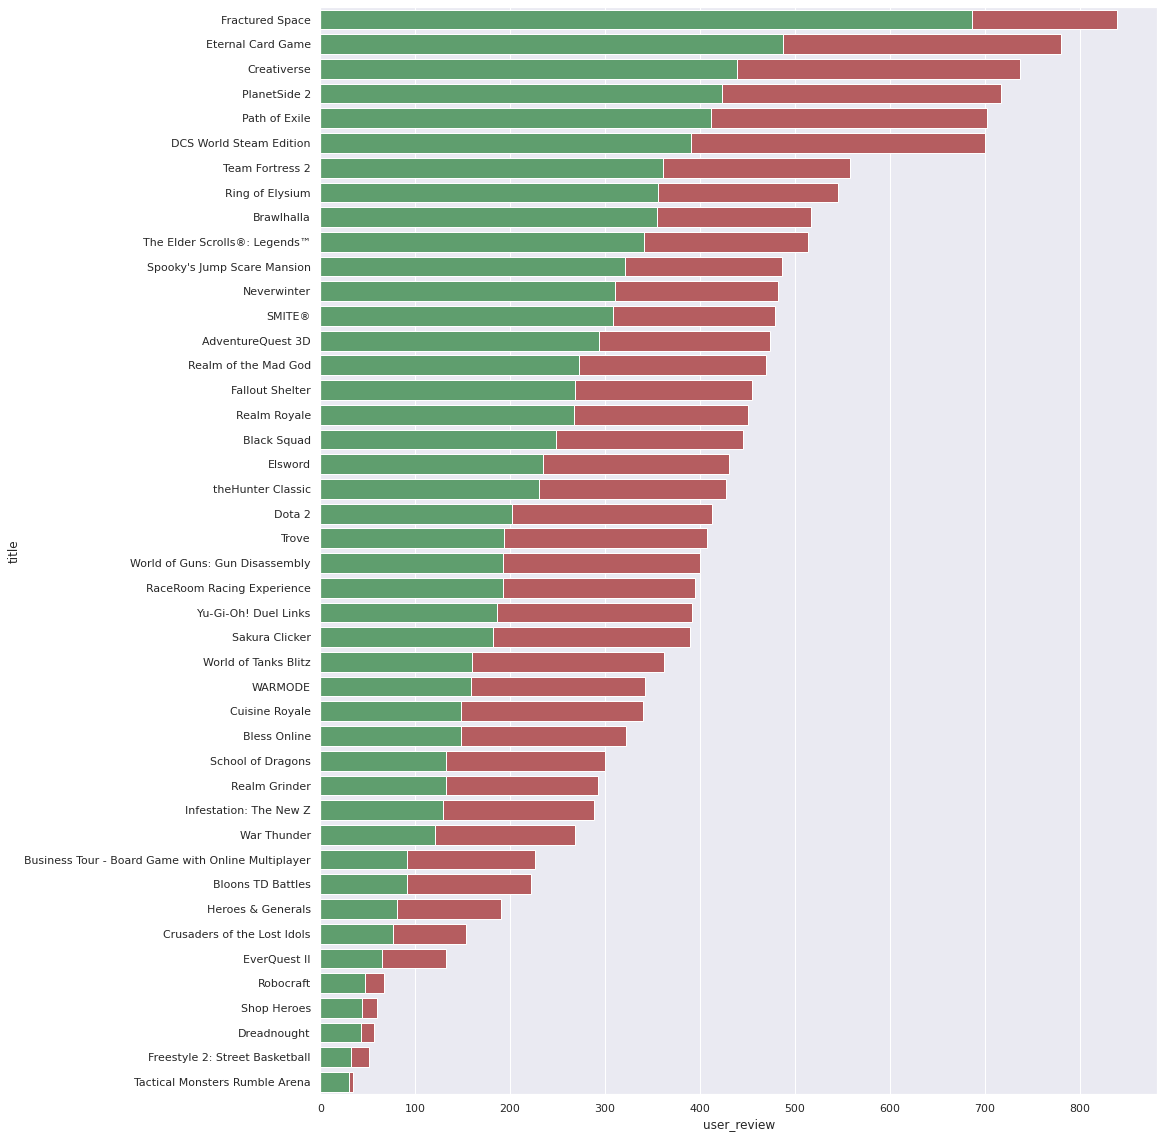

In [48]:
reviews_count = big_df.groupby(['title'])['user_review'].count().sort_values(ascending=False)

reviews_count = reviews_count.reset_index()

sns.set(style="darkgrid")
plt.figure(figsize=(15,20))
sns.barplot(y=reviews_count['title'], x=reviews_count['user_review'], data=reviews_count,
            label="Total", color="r")

reviews_count_pos = big_df.groupby(['title', 'user_suggestion'])['user_review'].count().sort_values(ascending=False)
reviews_count_pos = reviews_count_pos.reset_index()
reviews_count_pos = reviews_count_pos[reviews_count_pos['user_suggestion'] == 1]
sns.barplot(y=reviews_count_pos['title'], x=reviews_count_pos['user_review'], data=reviews_count_pos,
            label="Total", color="g")

In [49]:
year_count = big_df.groupby(['year'])['user_suggestion'].count().sort_values(ascending=False)

year_count = year_count.reset_index()
year_count

,year,user_suggestion
0,2018.0,4822
1,2016.0,4226
2,2017.0,3890
3,2015.0,2460
4,2014.0,1499
5,2013.0,340
6,2012.0,65
7,2011.0,14


In [50]:
print(big_df[big_df['year']==2011].user_suggestion.value_counts())
print(big_df[big_df['year']==2012].user_suggestion.value_counts())
print(big_df[big_df['year']==2013].user_suggestion.value_counts())
print(big_df[big_df['year']==2014].user_suggestion.value_counts())
print(big_df[big_df['year']==2015].user_suggestion.value_counts())
print(big_df[big_df['year']==2016].user_suggestion.value_counts())
print(big_df[big_df['year']==2017].user_suggestion.value_counts())
print(big_df[big_df['year']==2018].user_suggestion.value_counts())

1    13
0     1
Name: user_suggestion, dtype: int64
1    63
0     2
Name: user_suggestion, dtype: int64
1    274
0     66
Name: user_suggestion, dtype: int64
1    931
0    568
Name: user_suggestion, dtype: int64
1    1738
0     722
Name: user_suggestion, dtype: int64
1    2140
0    2086
Name: user_suggestion, dtype: int64
1    2307
0    1583
Name: user_suggestion, dtype: int64
1    2421
0    2401
Name: user_suggestion, dtype: int64


In [51]:
big_df.head(4)

,review_id,title,year,user_review,user_suggestion,sentiment,developer,publisher,tags,overview
0,1,Spooky's Jump Scare Mansion,2016.0,i m scared and hearing creepy voices so i ll...,1,-0.028125,Lag Studios,Lag Studios,horror free play cute first person singleplaye...,Can you survive 1000 rooms of cute terror? Or ...
1,2,Spooky's Jump Scare Mansion,2016.0,best game more better than sam pepper s youtu...,1,0.090000,Lag Studios,Lag Studios,horror free play cute first person singleplaye...,Can you survive 1000 rooms of cute terror? Or ...
2,3,Spooky's Jump Scare Mansion,2016.0,a littly iffy on the controls but once you kn...,1,0.011374,Lag Studios,Lag Studios,horror free play cute first person singleplaye...,Can you survive 1000 rooms of cute terror? Or ...
3,4,Spooky's Jump Scare Mansion,2015.0,great game fun and colorful and all that a si...,1,0.333333,Lag Studios,Lag Studios,horror free play cute first person singleplaye...,Can you survive 1000 rooms of cute terror? Or ...


In [52]:
testing_df.shape

(8045, 9)

In [53]:
training_gammes=big_df.title.unique()
testing_gammes=testing_df.title.unique()
print(len(training_gammes))
print(len(testing_gammes))
for i in testing_gammes:
    if i not in training_gammes:
        print(i)

44
20
Counter-Strike: Global Offensive
World of Warships
Star Trek Online
Paladins®
Shadowverse CCG
Tree of Savior (English Ver.)
VEGA Conflict
Minion Masters
The Lord of the Rings Online™
Fishing Planet
Crush Crush
Dungeon Defenders II
Governor of Poker 3
Digimon Masters Online
Shakes and Fidget
Champions Online
Magic Duels
Aura Kingdom
H1Z1
GUNS UP!


In [54]:
training_dev=big_df.developer.unique()
testing_dev=testing_df.developer.unique()
print(len(training_dev))
print(len(testing_dev))
for i in testing_dev:
    if i  in training_dev:
        print(i)

42
19
Wargaming Group Limited 
Cryptic Studios 


In [55]:
training_dev=big_df.publisher.unique()
testing_dev=testing_df.publisher.unique()
print(len(training_dev))
print(len(testing_dev))
for i in testing_dev:
    if i  in training_dev:
        print(i)

40
19
Valve 
Wargaming Group Limited 
Perfect World Entertainment 
Hi-Rez Studios 
Daybreak Game Company 


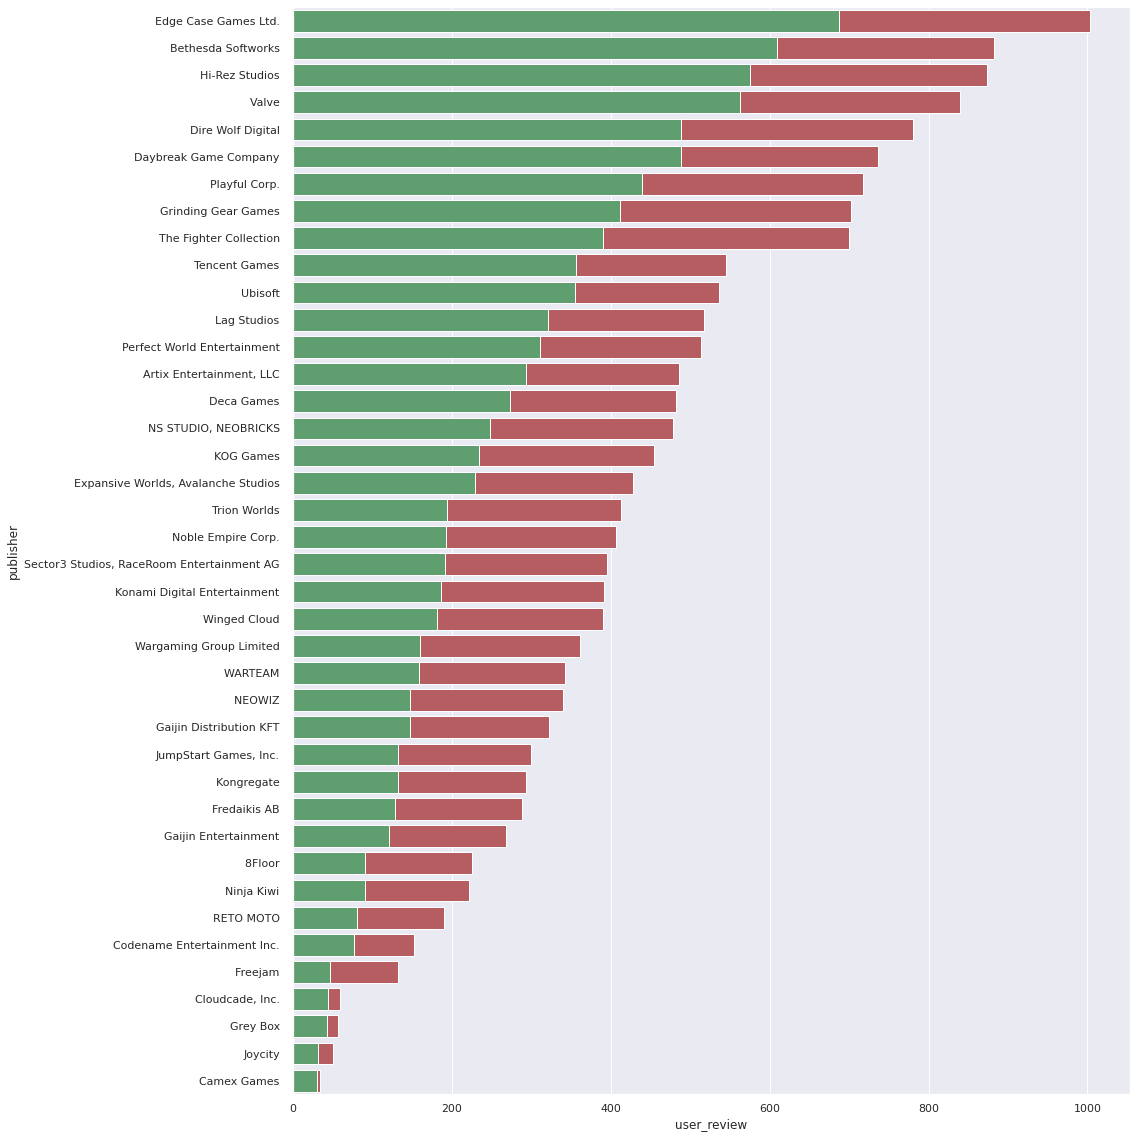

In [56]:
reviews_count = big_df.groupby(['publisher'])['user_review'].count().sort_values(ascending=False)

reviews_count = reviews_count.reset_index()

sns.set(style="darkgrid")
plt.figure(figsize=(15,20))
sns.barplot(y=reviews_count['publisher'], x=reviews_count['user_review'], data=reviews_count,
            label="Total", color="r")

reviews_count_pos = big_df.groupby(['publisher', 'user_suggestion'])['user_review'].count().sort_values(ascending=False)
reviews_count_pos = reviews_count_pos.reset_index()
reviews_count_pos = reviews_count_pos[reviews_count_pos['user_suggestion'] == 1]
sns.barplot(y=reviews_count_pos['publisher'], x=reviews_count_pos['user_review'], data=reviews_count_pos,
            label="Total", color="g")

# Valve  -- 50% > +ve
# Wargaming Group Limited 50% > -ve
# Perfect World Entertainment 50% > +ve
# Hi-Rez Studios 50% > +ve
# Daybreak Game Company 50% > +ve

# Word Cloud

In [57]:
Title_pos_df = big_df[big_df.sentiment > 0]
Title_neg_df = big_df[big_df.sentiment < 0]

Title_pos_df.sample(3)

,review_id,title,year,user_review,user_suggestion,sentiment,developer,publisher,tags,overview
5728,8179,DCS World Steam Edition,2015.0,please note this is a simulator not a game ...,1,0.157407,Eagle Dynamics SA,The Fighter Collection,simulation flight free play military multiplay...,"Feel the excitement of flying the Su-25T ""Frog..."
9506,13200,Realm of the Mad God,2014.0,i see a lot of reviews not recommending this g...,1,0.146406,"Wild Shadow Studios, Deca Games",Deca Games,free play massively multiplayer pixel graphics...,Realm of the Mad God is the first ever free to...
11196,16815,Eternal Card Game,2017.0,early access reviewi have played magic the gat...,0,0.092781,Dire Wolf Digital,Dire Wolf Digital,free play card game strategy trading card game...,The Game Has ChangedSix-guns and sorcery colli...


In [58]:
Title_neg_df.sample(3)

,review_id,title,year,user_review,user_suggestion,sentiment,developer,publisher,tags,overview
14084,20177,Infestation: The New Z,2016.0,the first thing that you ll probably encounter...,0,-0.106999,Fredaikis AB,Fredaikis AB,zombies free play survival multiplayer open wo...,Infestation: The New Z is a FREE TO PLAY multi...
6170,8625,Heroes & Generals,2014.0,early access reviewa good concept with nice se...,0,-0.050000,RETO MOTO,RETO MOTO,free play world war ii multiplayer fps war sho...,"Heroes & Generals is a full on, all-out WAR ex..."
4849,6839,SMITE®,2017.0,easy anti cheat an invasive and useless anti ...,0,-0.023810,Titan Forge Games,Hi-Rez Studios,free play moba multiplayer action third person...,Enter the Battleground of the GodsJoin the mil...


In [62]:
pos_words =[]
neg_words = []
# neu_words = []

for text in Title_pos_df.user_review:
    pos_words.append(text) 
pos_words = ' '.join(pos_words)
# pos_words[:40]


for text in Title_neg_df.user_review:
    neg_words.append(text)
neg_words = ' '.join(neg_words)
# neg_words[:400]

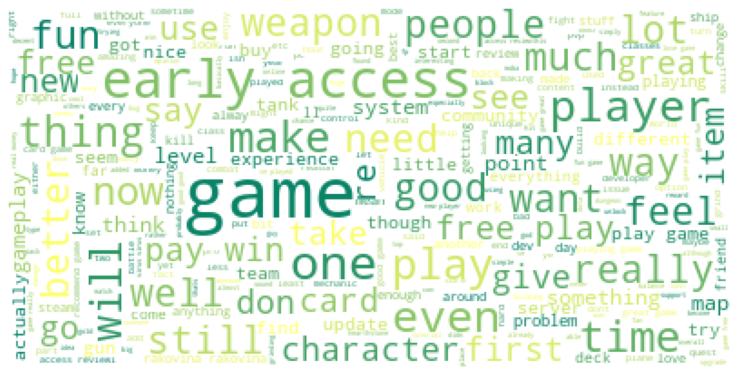

In [63]:
wordcloud = WordCloud().generate(pos_words)

wordcloud = WordCloud(background_color="white",max_words=len(pos_words),\
                      max_font_size=40, relative_scaling=.5, colormap='summer').generate(pos_words)
plt.figure(figsize=(13,13))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

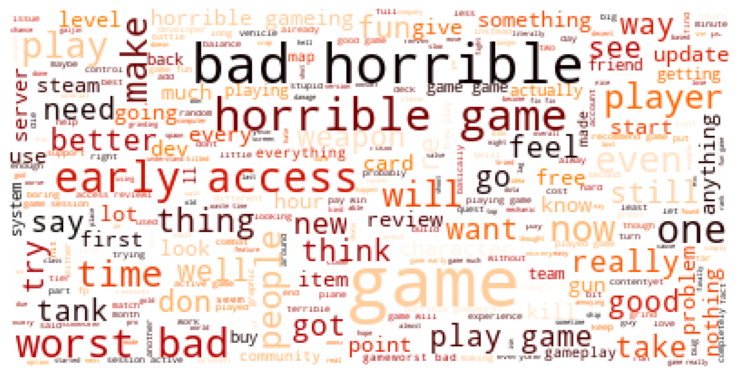

In [64]:
wordcloud = WordCloud().generate(neg_words)

wordcloud = WordCloud(background_color="white",max_words=len(neg_words),\
                      max_font_size=40, relative_scaling=.5, colormap='gist_heat').generate(neg_words)
plt.figure(figsize=(13,13))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# Lets Predict with TFIDF

In [65]:
big_df.head(4)

,review_id,title,year,user_review,user_suggestion,sentiment,developer,publisher,tags,overview
0,1,Spooky's Jump Scare Mansion,2016.0,i m scared and hearing creepy voices so i ll...,1,-0.028125,Lag Studios,Lag Studios,horror free play cute first person singleplaye...,Can you survive 1000 rooms of cute terror? Or ...
1,2,Spooky's Jump Scare Mansion,2016.0,best game more better than sam pepper s youtu...,1,0.090000,Lag Studios,Lag Studios,horror free play cute first person singleplaye...,Can you survive 1000 rooms of cute terror? Or ...
2,3,Spooky's Jump Scare Mansion,2016.0,a littly iffy on the controls but once you kn...,1,0.011374,Lag Studios,Lag Studios,horror free play cute first person singleplaye...,Can you survive 1000 rooms of cute terror? Or ...
3,4,Spooky's Jump Scare Mansion,2015.0,great game fun and colorful and all that a si...,1,0.333333,Lag Studios,Lag Studios,horror free play cute first person singleplaye...,Can you survive 1000 rooms of cute terror? Or ...


# NLP

In [66]:

from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
stop = stopwords.words('english')
stop.append("i'm")
stop.remove("not")


stop_words = []

for item in stop: 
    new_item = punctuation_removal(item)
    stop_words.append(new_item) 
# print(stop_words[::12])


def stopwords_removal(messy_str):
    messy_str = word_tokenize(messy_str)
    return [word.lower() for word in messy_str 
            if word.lower() not in stop_words ]

big_df['user_review'] = big_df['user_review'].apply(stopwords_removal)
testing_df['user_review'] = testing_df['user_review'].apply(stopwords_removal)

In [67]:
def drop_numbers(list_text):
    list_text_new = []
    for i in list_text:
        if not re.search('\d', i):
            list_text_new.append(i)
    return ' '.join(list_text_new)

big_df['user_review'] = big_df['user_review'].apply(drop_numbers)
testing_df['user_review'] = testing_df['user_review'].apply(drop_numbers)

In [68]:
porter = PorterStemmer()
big_df['user_review'] = big_df['user_review'].apply(lambda x: x.split())
testing_df['user_review'] = testing_df['user_review'].apply(lambda x: x.split())


def stem_update(text_list):
    text_list_new = []
    for word in text_list:
        word = porter.stem(word)
        text_list_new.append(word) 
    return text_list_new


big_df['user_review'] = big_df['user_review'].apply(stem_update)
testing_df['user_review'] = testing_df['user_review'].apply(stem_update)


In [69]:
big_df['user_review'] = big_df['user_review'].apply(lambda x: ' '.join(x))
testing_df['user_review'] = testing_df['user_review'].apply(lambda x: ' '.join(x))


In [70]:
training_text = big_df['user_review']
testing_text = testing_df['user_review'] 

In [71]:
training_text = pd.DataFrame(training_text)
testing_text = pd.DataFrame(testing_text)

#### both are preprocessed the testing and the training dataframes

# Vectorizing

In [72]:
def text_vectorizing_process(sentence_string):
    return [word for word in sentence_string.split()]

vector_obj = CountVectorizer(text_vectorizing_process,max_features=2000,ngram_range=(1, 3))
vector_obj.fit(training_text['user_review'])
Title_text= vector_obj.transform(training_text['user_review'])


In [73]:
Title_text_testing= vector_obj.transform(testing_text['user_review'])

In [74]:
print('Shape of Sparse Matrix', Title_text_testing.shape)

Shape of Sparse Matrix (8045, 2000)


In [75]:
print('Shape of Sparse Matrix', Title_text.shape)
print('Amount of Non-Zero occurences:', Title_text.nnz)

Shape of Sparse Matrix (17316, 2000)
Amount of Non-Zero occurences: 880133


In [76]:
Title_tfidf_transformer = TfidfTransformer().fit(Title_text)

In [77]:
Title_messages_tfidf = Title_tfidf_transformer.transform(Title_text)


In [78]:
Title_messages_tfidf_testing = Title_tfidf_transformer.transform(Title_text_testing)

In [79]:
Title_messages_tfidf_testing = Title_messages_tfidf_testing.toarray()
Title_messages_tfidf_testing = pd.DataFrame(Title_messages_tfidf_testing)
print(Title_messages_tfidf_testing.shape)
Title_messages_tfidf_testing.head()

(8045, 2000)


,0,1,2,3,4,5,6,7,8,9,...,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.086775,0.107087,0.10878,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.031316,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [80]:
Title_messages_tfidf = Title_messages_tfidf.toarray()
Title_messages_tfidf = pd.DataFrame(Title_messages_tfidf)
print(Title_messages_tfidf.shape)
Title_messages_tfidf.head()

(17316, 2000)


,0,1,2,3,4,5,6,7,8,9,...,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.206269,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Title_df_all = pd.merge(Title_messages_tfidf, big_df['user_suggestion'],
#                   left_index=True, right_index=True )
# Title_df_all.head()

In [ ]:
# print(type(testing_tag_dtm))
print(type(Title_messages_tfidf_testing))

In [ ]:
# testing_tag_dtm = pd.DataFrame(testing_tag_dtm)

In [ ]:
# testing_tag_dtm

In [ ]:
# testing_tag_dtm = pd.DataFrame(testing_tag_dtm)

# testing_review_tag = pd.merge(Title_messages_tfidf_testing,testing_tag_dtm ,
#                   left_index=True, right_index=True )
# testing_review_tag.head()

In [82]:
# print(type(tag_dtm))
# print(type(Title_df_all))


<class 'scipy.sparse.csr.csr_matrix'>


In [96]:
Title_messages_tfidf.shape

(17316, 2000)

In [97]:
tag_vector.shape

(64, 179)

In [94]:
review_tag = pd.merge(Title_messages_tfidf,tag_vector ,
                  left_index=True, right_index=True )
review_tag.head()

,0_x,1_x,2_x,3_x,4_x,5_x,6_x,7_x,8_x,9_x,...,169_y,170_y,171_y,172_y,173_y,174_y,175_y,176_y,177_y,178_y
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,1,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0


In [95]:
review_tag.shape

(64, 2179)

In [91]:
X = review_tag.values
y = big_df['user_suggestion'].values

# X.head()

In [92]:
from sklearn.model_selection import train_test_split as split

X_train, X_test, y_train, y_test = split(X,y, test_size=0.01, random_state=12)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

ValueError: Found input variables with inconsistent numbers of samples: [64, 17316]

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

Title_scaler = MinMaxScaler()
X_train_scaled = Title_scaler.fit_transform(X_train)
X_test_scaled = Title_scaler.transform(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
clf = LogisticRegression(max_iter=400,C=0.4,tol=1e-5,solver='liblinear',class_weight={1:1,0:1},multi_class='ovr',
                        verbose=0,warm_start=True,
                        )#dual=True,

clf.fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)

print('LogisticRegression accuracy_score {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
clf.score(X_train_scaled, y_train)

In [ ]:
# from sklearn import svm
# clf = svm.SVC(kernel='linear')
# clf.fit(X_train_scaled, y_train)
# y_pred = clf.predict(X_test_scaled)

# print('LogisticRegression accuracy_score {0:0.4f}'. format(accuracy_score(y_test.values, y_pred)))
# clf.score(X_train_scaled, y_train)

In [ ]:
# from xgboost import XGBClassifier

# clf= XGBClassifier(learning_rate=0.04, n_estimators=406, max_depth=5,
#                         min_child_weight=4, 
#                          seed=27)
# clf.fit(X_train_scaled, y_train)
# y_pred = clf.predict(X_test_scaled)

# print('LogisticRegression accuracy_score {0:0.4f}'. format(accuracy_score(y_test.values, y_pred)))
# clf.score(X_train_scaled, y_train)

In [ ]:
# from sklearn import linear_model
# clf = linear_model.Lasso(alpha=1,eps=1e-4)

# clf.fit(X_train_scaled, y_train)
# y_pred = clf.predict(X_test_scaled)

# preds = []
# for x in y_pred:
#     preds.append(int(x.round()))
    
# print('LogisticRegression accuracy_score {0:0.4f}'. format(accuracy_score(y_test.values, preds)))
# clf.score(X_train_scaled, y_train)

# Building model for testing dataframe

# X = Independent Variable , Y = Independent Variable  without tag -- gives less acc

In [ ]:
X = Title_df_all.drop(['user_suggestion'], axis=1)
y = Title_df_all.user_suggestion

X.head()

In [ ]:
from sklearn.model_selection import train_test_split as split

X_train, X_test, y_train, y_test = split(X,y, test_size=0.3, random_state=111)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

Title_scaler = MinMaxScaler()
X_train_scaled = Title_scaler.fit_transform(X_train)
X_test_scaled = Title_scaler.transform(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
clf = LogisticRegression(max_iter=400,C=0.4,tol=1e-5,solver='liblinear',class_weight={1:1,0:1},multi_class='ovr',
                        verbose=0,warm_start=True,
                       )
clf.fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)

print('LogisticRegression accuracy_score {0:0.4f}'. format(accuracy_score(y_test.values, y_pred)))
clf.score(X_train_scaled, y_train)

# end  -- so not using it alone

# lets predict on the basis of tags

In [ ]:
vectorizer = CountVectorizer(tokenizer = lambda x: x.split())
tag_dtm = vectorizer.fit_transform(big_df['tags'])
print("Number of data points :", tag_dtm.shape[0])
print("Number of unique tags :", tag_dtm.shape[1])

In [ ]:
tag_dtm

In [ ]:
big_df.head(1)

In [ ]:
tag_dtm = tag_dtm.toarray()
tag_dtm = pd.DataFrame(tag_dtm)

# merge

In [ ]:
tag_dtm

In [ ]:
Tag_df_all = pd.merge(tag_dtm, big_df['user_suggestion'],
                  left_index=True, right_index=True )
Tag_df_all.head()

# X Y

In [ ]:
X = Tag_df_all.drop(['user_suggestion'], axis=1)
y = Tag_df_all.user_suggestion

X.head()

# split

In [ ]:
from sklearn.model_selection import train_test_split as split

X_train, X_test, y_train, y_test = split(X,y, test_size=0.3, random_state=111)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

Title_scaler = MinMaxScaler()
X_train_scaled = Title_scaler.fit_transform(X_train)
X_test_scaled = Title_scaler.transform(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
clf = LogisticRegression(max_iter=200, )
clf.fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)

print('LogisticRegression accuracy_score {0:0.4f}'. format(accuracy_score(y_test.values, y_pred)))
clf.score(X_train_scaled, y_train)